# **Classificação com KNN**

* Aprendizado supervisionado
* Mapeamento de um vetor de atributos para um atributo de classe
* Seja $x_i$ um conjunto de $n$ instâncias pertencentes a uma classe $c$ 
  * $x_i$ tem dimensão $d$
  * existem $m$ classes, $c \in {c_1,...,c_m}$
* Aprendizagem é identificar a função $f$ tal que:
  * $f([x_{i1},x_{i2},...,x_{id}]) = c$

## **Dados de Câncer de Mama**

* Dataset com atributos de nódulos identificados em imagens digitais de exames de mama. Dados descrevem características do núcleo celular presentes na imagem e o diagnóstico associado (maligno ou benigno).
* Atributos numéricos descrevem:
 * raio
 * textura
 * perímetro
 * area
 * suavidade
 * compacidade
 * concavidade
 * simetria
 * dimensão fractal
* 559 instâncias
* Problema de classificação binária

# 1. Importando as bibliotecas necessárias

In [93]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Lendo os dados

In [94]:
dados = pd.read_csv('data.csv')
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 3. Limpeza e Organização dos dados

In [95]:
# Excluindo colunas irrelevantes
dados = dados.drop(['Unnamed: 32', 'id'], axis=1)

In [96]:
# Temos atributos de três tipos: "mean", "se" e "worst". Utilizaremos, aqui, apenas a "mean", pois essa nos dá a média de cada atributo.
dados = dados.drop(columns=['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [97]:
#trocando o tipo do atributo diagnostico por um tipo numerico
dados['diagnosis'] = dados['diagnosis'].replace(['M','B'],[1,0])
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [98]:
# Re-escala usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())

# 4. Análise Exploratória dos dados

In [99]:
# Verificando as dimensões do dataset
print(dados.shape)

(569, 11)


In [100]:
# Verificando informações adicionais do dataset
display(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    float64
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(11)
memory usage: 49.0 KB


None

In [101]:
# Estatística Descritiva das Variáveis
display(dados.describe())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
# Verificando se há linhas duplicadas
print(dados.duplicated().sum())

0


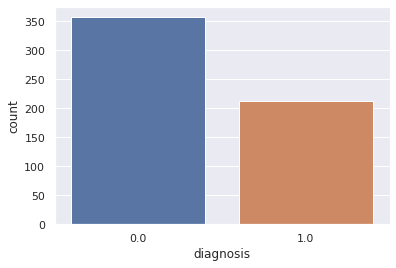

In [103]:
# Criando um Gráfico de Barras para  mostrar a frequência da Variável "diagnosis" (Nossa Classe a ser Predita)
sns.set_theme(style='darkgrid')
sns.countplot(x=dados['diagnosis'])

In [104]:
print(dados.diagnosis.value_counts())

0.0    357
1.0    212
Name: diagnosis, dtype: int64


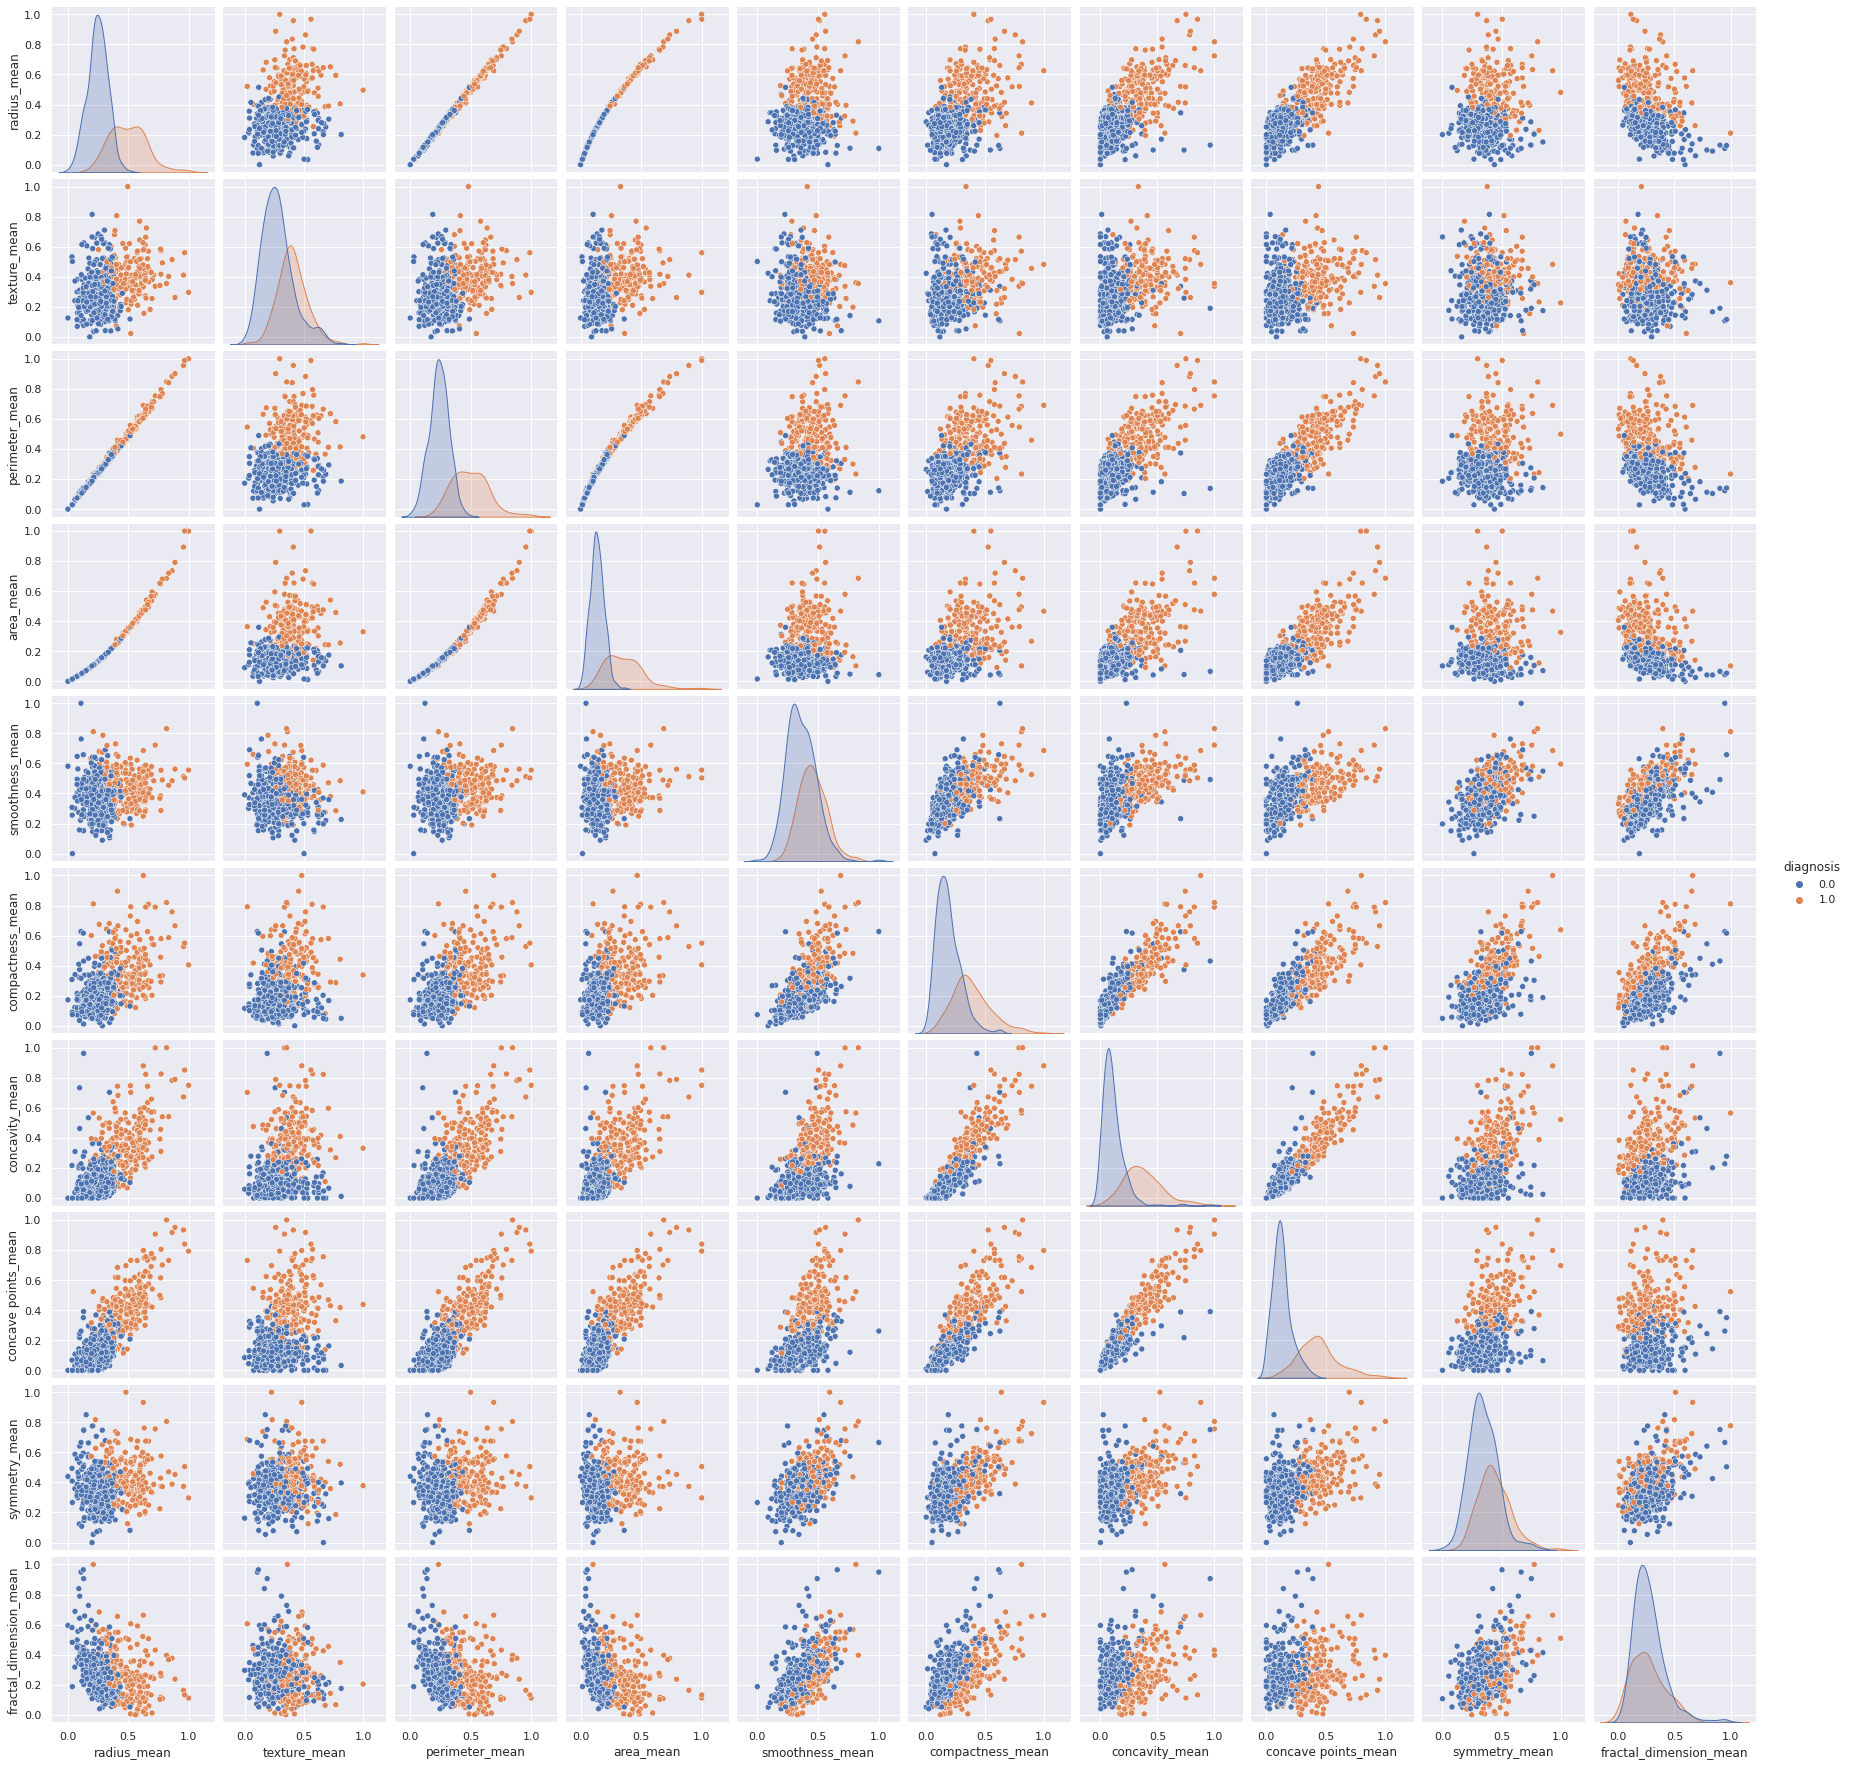

In [105]:
# Plotaremos um gráfico de correlação do conjunto de dados para encontrar padrões úteis para a modelagem.
sns.pairplot(dados, hue='diagnosis')

# 5. Separação das Variáveis explicativas (X) e o Target (y) para treinamento do algoritmo na Máquina Preditiva

In [106]:
X = dados.iloc[:, 1:]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


In [107]:
y = dados.diagnosis.astype(int)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

# 6. Filtrando as melhores variáveis

In [108]:
# Usando o ExtraTree para nos mostrar as variáveis mais Importantes
from sklearn.ensemble import ExtraTreesClassifier

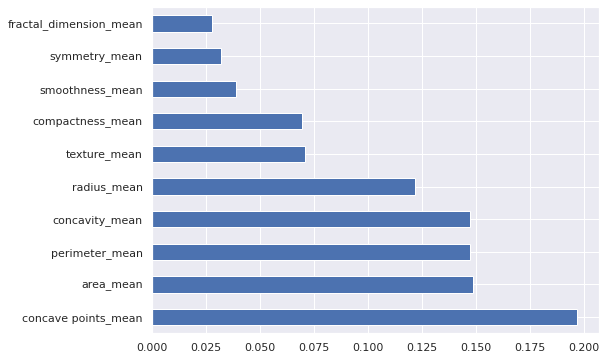

In [109]:
modelo = ExtraTreesClassifier()
modelo.fit(X,y)

plt.figure(figsize=(8,6))
melhores = pd.Series(modelo.feature_importances_,index=X.columns)
melhores.nlargest(24).plot(kind='barh')
plt.show()

In [110]:
# Função para ranquear as 5 mais importantes
print(melhores.nlargest(5).index)

Index(['concave points_mean', 'area_mean', 'perimeter_mean', 'concavity_mean',
       'radius_mean'],
      dtype='object')


In [111]:
# Separando as 5 variáveis mais importantes em "X" para que o algoritmo treine com esses dados
X = dados[['concave points_mean', 'concavity_mean', 'radius_mean', 'area_mean',
       'perimeter_mean']]
X.head()

,concave points_mean,concavity_mean,radius_mean,area_mean,perimeter_mean
0,0.731113,0.703140,0.521037,0.363733,0.545989
1,0.348757,0.203608,0.643144,0.501591,0.615783
2,0.635686,0.462512,0.601496,0.449417,0.595743
3,0.522863,0.565604,0.210090,0.102906,0.233501
4,0.518390,0.463918,0.629893,0.489290,0.630986


**Dividindo os dados em treino e teste**

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# 7. Construção e Avaliação da Máquina Preditiva

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
#definindo modelo
classificador = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [116]:
#treinando modelo
print(classificador.fit(X_train,y_train))

KNeighborsClassifier(metric='euclidean', n_neighbors=3)


In [117]:
#realizando classificação
classificacao = classificador.predict(X_test)

# 8. Avaliação do classificador

In [118]:
#calculando o recall
from sklearn.metrics import recall_score

In [127]:
recall = recall_score(y_test,classificacao)
print(recall)

0.9


# Validação cruzada

* A forma de avaliação anterior dividiu o dataset em dois subconjuntos disjuntos: treino e teste
    * o treino foi usado para construir o modelo
    * o teste foi usado para avaliar o modelo
* **No entanto, devido a aleatoriedade, o resultado pode não ser tão confiável.**
* **Validação cruzada k-fold**
    * dividir o conjunto de dados em  subconjuntos (folds) disjuntos
    * um subconjunto é usado para teste
    * os outros k-1 subconjuntos são usados para criar o modelo
    * repete-se o procedimento k vezes, alternando o subconjunto de teste
    * calcula-se a acurácia média das k repetições e tem-se a avaliação do método


![dataml_cross_validation](https://user-images.githubusercontent.com/98621150/159810655-2f710251-a269-4e66-a676-f92b97ed9764.jpg)

In [120]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [121]:
kf = KFold(n_splits=10, shuffle=True)

In [122]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [123]:
#define modelo
classificador = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [124]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=kf)

In [125]:
print(scores.mean(),scores.std())

0.9156015037593985 0.03131835681146349
